In [46]:
import numpy as np
import matplotlib.pyplot as plt

Question A: It is given that the clearence cost $p_s$ is higher than the cost of selling the items at a loss $p_l$. Therefore the (low) price $p_l$ of the item should be less than cost of the item $c$ added to the shipping cost $c_s$ of the item. Therefore we have $p_l < c + c_s$.

Question B: We can derive the expression for $\tilde{c},\tilde{p}$ very quickly by noting:
$$\tilde{c} = c + c_s$$
$$\tilde{p} = \min{\{p,p_L\}}$$

With that we can derive the following profit function:

$$\Pi(Q,Y,c,p,c_s,p_L) = \max{\{0,Q-Y\}} p_L +\min{\{Y,Q\}}p-\max{\{0,Q-Y\}}c_s - Qc$$


Question C: With the result from b we can derive the optimal order quantity $Q^*$ by using the theorem from class:
We know:
$$\text{Critical quantile} = \frac{\text{underage cost}}{\text{underage cost} + \text{overage cost}}$$
We know:
$$\text{underage cost} = \text{cost of lost sale} = p - c $$
$$\text{overage cost} = \text{cost per unsold item} = c + c_s - p_L $$
Therefore the critial quantile is:
$$\text{Critical quantile} = \frac{p - c}{c + c_s - p_L + p - c}$$
$$\text{Critical quantile} = \frac{p - c}{p + c_s - p_L}$$
Therefore we have the optimal order quantity
$$Q^*(F_Y) = F_Y^{-1} \Bigg (\frac{p - c}{p + c_s - p_L} \Bigg)$$


Question D: We will use the following bit of Python code:

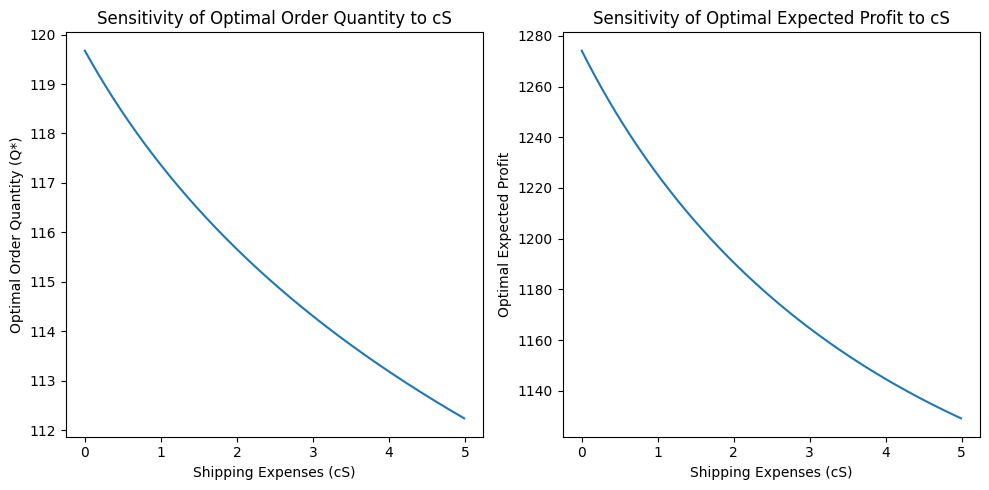

In [59]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def calculateOptimalOrderQuantity(p,p_L,c,c_s,stdevDemand, meanDemand):
    overage_cost = p - c
    underage_cost = c + c_s - p_L
    quantile = overage_cost / ( overage_cost + underage_cost)
    optimalQuantity = norm.ppf(quantile, loc=meanDemand, scale=stdevDemand)
    return optimalQuantity

def calculateOptimalProfit(p,p_L,c,c_s,Q_star, meanDemand):
    s = Q_star - meanDemand
    profit = -Q_star * c - max(0,s) * c_s + max(Q_star, meanDemand) * p + max(0,s) * p_L
    return profit


stdevDemand = 10
meanDemand = 110

cost = 10
price = 20
priceLow = 8
shippingCost = 2

# Optimal order quantity vs shipping expenses
cS_values = np.arange(0, 5, 0.01)  # Adjust the range as needed

# Lists to store the results
optimal_quantity = []
optimal_profit = []

# Calculate Q* and optimal profit for each cS value
for cS in cS_values:
    Q_star = calculateOptimalOrderQuantity(price, priceLow, cost, cS, stdevDemand, meanDemand)
    optimal_quantity.append(Q_star)
    profit = calculateOptimalProfit(price, priceLow, cost, cS, Q_star, meanDemand)
    optimal_profit.append(profit)

# Plotting the sensitivity graphs
plt.figure(figsize=(10, 5))

# Sensitivity graph for Q*
plt.subplot(1, 2, 1)
plt.plot(cS_values, optimal_quantity)
plt.xlabel('Shipping Expenses (cS)')
plt.ylabel('Optimal Order Quantity (Q*)')
plt.title('Sensitivity of Optimal Order Quantity to cS')

# Sensitivity graph for optimal profit
plt.subplot(1, 2, 2)
plt.plot(cS_values, optimal_profit)
plt.xlabel('Shipping Expenses (cS)')
plt.ylabel('Optimal Expected Profit')
plt.title('Sensitivity of Optimal Expected Profit to cS')

# Display the plots
plt.tight_layout()
plt.show()